


# Overview
Every suicide is a tragedy affecting many people around. It is also one of major risks of death especially among adults. [World Health organization](https://www.who.int/) maintains a suicide statistics dataset for many years and has it available for the analysis. 
This dataset provides a number of suicide events and population per year for several age groups per country, year,sex, and several age groups.
This allows to analyze how the world changed in 21 century for presented age groups separately. At this preliminary analysis we will look at:
### questions:
 ##### What age group is the biggest contributor?  [q1]
 ##### What countries experienced the biggest change?  (total numbers) [q2](#a2)
 ##### What countries show the biggest change in the rate?[q3]
 ##### Do we have a significant difference between men and women? [q4](#a3)
 ##### What is different for adults? [q5](#a4)
 ##### What countries changed for better and what countries changed for worse?[q6] 


# Introduction & Analysis

Our dataset has 6 columns and 43776 rows. Three columns are numerical and 3 are categorical. When we look at the dataset we see a lot missing values and sometimes 0 for columns suicide_no and population. 
We can review number of missing and 0 by age group
![](missing_by_age.png)
As you can see age group 35 - 54 has minimum number of missing values. We will choose this group for the detailed analysis.

For our analysis we need to eliminate null and 0 records. When we select only rows with all the data in place our dataset will be reduced to 2628 rows.  
Let's look at the total numbers all ages groups all data excluding records with missing values: reported population, total number of cases and rate.
#### Answers to the questions 
![](population_per_year.png)
As we see reported population fluctuates. This is direct result of elimination of records with the missing suicide data.

If we look at the total number of suicide (cases) we see some decline in total numbers
![](total_cases_per_year.png)

and some decline in rate - number of cases per 100,000 for the population
(? include table top 10 ?)
![](rate_per_year_all.png)
Overall the change is about 20%.

We can check overall case distribution for age groups.  
##### A1: Case distribution by age groups  

![](case_distr.png) 
As we see the biggest contributor by far is age group 35 - 54. 
Previously I demonstrated that this group has minimum number of missing records.
We will look specifically at this cohort later. 
 

##### A2: Countries experienced the biggest change
Now let's see what countries that experienced the biggest change in total numbers.
Note that we summarizing data for all age groups and for male and female. So some 
difference could be attributed to the missing data. 

![](num_diff.png)

However if we look at the rate situation is very different
##### A3: What countries show the biggest change in the rate?
![](rate_diff.png)
I attribute it to much smaller population in in Suriname Aruba and other countries. As result small changes in total numbers makes big difference in rate.  

##### A4: Do we have a significant difference between men and women?
Our dataset includes sex variable. This allows us to compare men and women separately. 
![toal_men_and_women](compare_male_female_num.png)

As expected number of suicides cases for men is much bigger. Note that we  see almost the same countries in both cases. 
As I mentioned previously missing data may impact our analysis. To have better picture we will look at the age group that has minimum number of missing data: 35 to 54 years. 
Below is top 10 counties that experienced the biggest change in total numbers.
![adults_num_diff](dts3_num_diff.png)
![adults_rate_diff](rate_diff_3r.png)
![adults_male_female_num](adult_male_female_num.png)

##### A6: Who changed for better or for worse
We've seen the changes, but who changed for better and who changed for worse? We define "for better" as year of the minimum is bigger as a year of the maximum.
Below is the list of top 10 countries with the maximum improvements on suicide cases. Number of suicide cases declined substantially 
![](adult_improv_big.png)

and list of top 10 countries where number of suicide cases got much higher.
![](adult_stback_big.png)



# Conclusion

This is just initial analysis of the data shown non obvious results. Working with real data it is important to evaluate missing and 0. There distribution may change what and how you analyze. 
Analysis shown countries with top improvements and top setback in suicide events. We see that improving economy not necessary results in less number of suicides. Also note the difference  between men and women in per country distribution. 
Deeper analysis could be done by linking this dataset to other appropriate information and modeling based on combined data. 


Please find attached the code used in this analysis

 

### Code start 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
sa=pd.read_csv('who_suicide_statistics.csv')
lfexp=pd.read_csv('LifeExpectancyData.csv')


In [3]:
sa.shape

(43776, 6)

In [4]:
sa.head(5)

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [80]:
# do we have any missing ? 
sa.isnull().sum()


country           0
year              0
sex               0
age               0
suicides_no     408
population     2856
age_encoder       0
sex_encoder       0
dtype: int64

In [7]:
#print(sa[sa.isnull().any(axis=1)]['population'].head(20))
pop0=sa[sa['population'].isnull()] 
#population_0=sa['population'].isnull
pop0.head(5)
# as rusult we see that population is missing when number of cases is 0
                                suicides_no

,country,year,sex,age,suicides_no,population
372,Anguilla,1983,female,15-24 years,0.0,NaN
373,Anguilla,1983,female,25-34 years,0.0,NaN
374,Anguilla,1983,female,35-54 years,0.0,NaN
375,Anguilla,1983,female,5-14 years,0.0,NaN
376,Anguilla,1983,female,55-74 years,0.0,NaN


In [8]:
# select years of interest 
sa = sa[(sa['year'] > 1999) & (sa['year'] < 2016) ] 

In [9]:
sa.shape

(21492, 6)

In [10]:
# do we have any missing ? 
sa.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no     408
population     2856
dtype: int64

In [11]:
# encode age and sex 
age_coder = {'5-14 years':0,
            '15-24 years':1,
            '25-34 years':2,
            '35-54 years':3,
            '55-74 years':4,
            '75+ years':5}
gender_coder = {'female':0,'male':1}


In [12]:
sa['age_encoder'] = sa['age'].map(age_coder)
sa['sex_encoder'] = sa['sex'].map(gender_coder)
sa.head(10)

##### NULLS

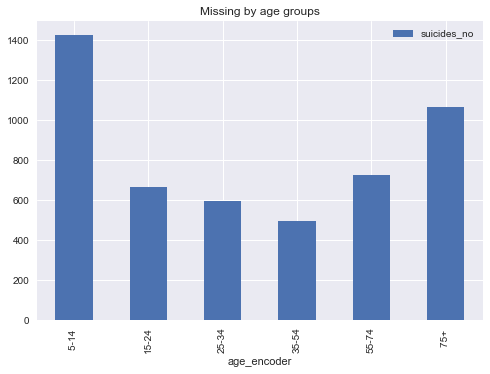

In [250]:
# distribution of missing and null over age groups
nls=sa[(sa['suicides_no']==0)] 
nl= sa[sa['suicides_no'].isnull()]
frames=[nls,nl]
nulsz= pd.concat(frames)
nulsz.shape    
nulsz.head(11)
#how to select countries that have data 
#loop through  the rows, make list of countries, include ones that have 1 no zero 
en = {0:'5-14 ',
      1:'15-24',
      2:'25-34',
      3:'35-54',
      4:'55-74',
      5:'75+ '}
plt.figure(figsize=(12,9))
nd=nulsz.groupby('age_encoder').count()

nd.drop(['year','sex','population','country','sex_encoder','age'],axis=1, inplace=True)
nd.head(11)
nd.plot(nd.index.map(en.get), kind='bar', stacked=False, title='Missing by age groups')
plt.savefig('missing_by_age.png')
plt.show()

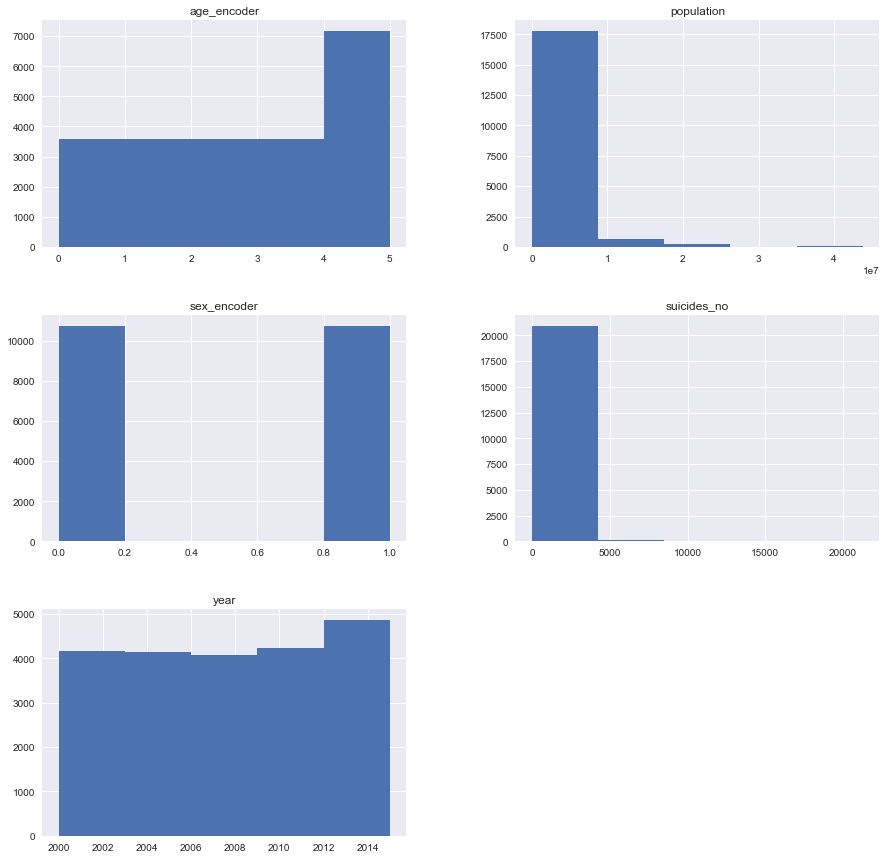

In [14]:
sa.hist(figsize = (15,15),bins=5 )
plt.savefig('allvars.png')
plt.show()

In [15]:
# Eliminate null
dfa=sa.dropna()

In [16]:
#elminate 0 
dfa=dfa[(dfa['suicides_no'] > 0) & (dfa['population'] > 0)]
dfa.shape

(14975, 8)

In [17]:
#Calculate rate per 100,000
rateFn = lambda row: 100000 * row['suicides_no'] / row['population']
dfa['rate'] = dfa.apply(rateFn , axis=1)

##### A1: case distribution 
<a id='c1'></a>


In [18]:
#Summarize the world by age group
ta=dfa.groupby('age_encoder')[['suicides_no']].sum()

In [19]:
#ta=groupby('age_encoder')[['suicides_no']].sum()
en = {0:'5-14 years',
      1:'15-24 years',
      2:'25-34 years',
      3:'35-54 years',
      4:'55-74 years',
      5:'75+ years'}
print(ta.index.map(en.get))
#ta.head(11)

Index(['5-14 years', '15-24 years', '25-34 years', '35-54 years',
       '55-74 years', '75+ years'],
      dtype='object', name='age_encoder')


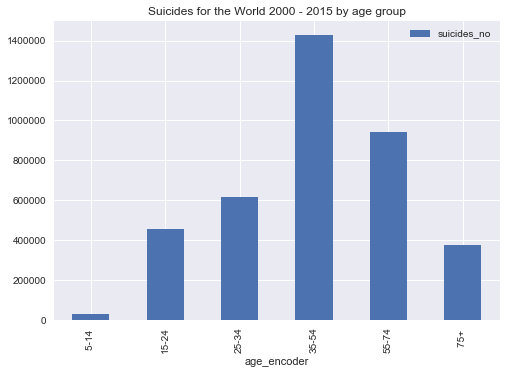

In [81]:
#Suicide based on age groups
en = {0:'5-14 ',
      1:'15-24',
      2:'25-34',
      3:'35-54',
      4:'55-74',
      5:'75+ '}
plt.figure(figsize=(12,9))

ta.plot(ta.index.map(en.get), kind='bar', stacked=False, title='Suicides for the World 2000 - 2015 by age group' )
#plt.title("Total Suicide based in Age group")
#plt.xlabel("Age Group")
#plt.ylabel("Number of Suicide")
plt.savefig("case_distr.png")
plt.show()

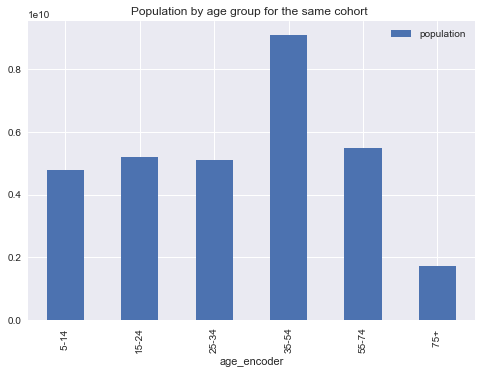

In [24]:
#population the same way
tp=dfa.groupby('age_encoder')[['population']].sum()
plt.figure(figsize=(12,9))

tp.plot(tp.index.map(en.get), kind='bar', stacked=False, title='Population by age group for the same cohort ' )
plt.savefig("population_distr.png")
plt.show()

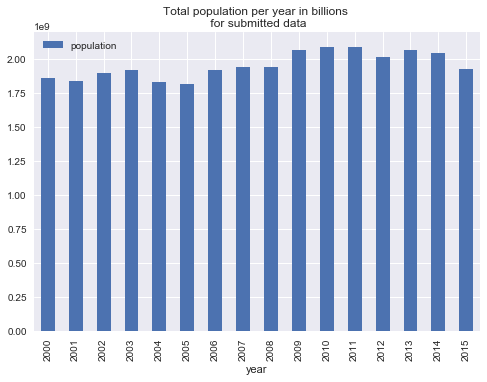

In [82]:
py=dfa.groupby('year')[['population']].sum()
plt.figure(figsize=(12,10))
py.plot(py.index, kind='bar', stacked=False, title='Total population per year in billions \n for submitted data' )
plt.savefig("population_per_year.png")
plt.show()


<a id='c2'></a> #total_cases_per_year

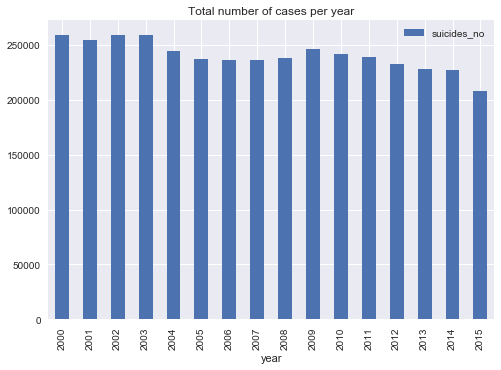

In [37]:
#total cases per year 

cy=dfa.groupby('year')[['suicides_no']].sum()
plt.figure(figsize=(12,10))
cy.plot(py.index, kind='bar', stacked=False, title='Total number of cases per year' )
plt.savefig("total_cases_per_year.png")
plt.show()


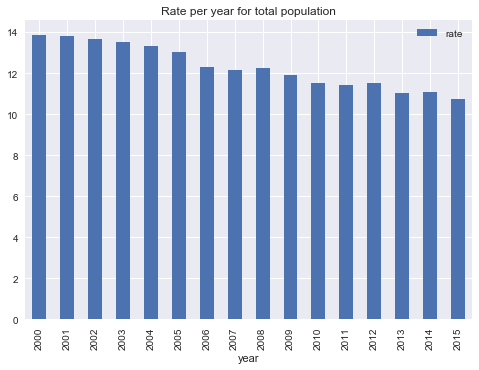

In [48]:
#total rate per year 
cpy=dfa.groupby('year').agg({'suicides_no':sum,'population':sum})
rateFn = lambda row: 100000 * row['suicides_no'] / row['population']
cpy['rate'] = cpy.apply(rateFn , axis=1)
cpr=cpy.drop(['suicides_no','population'],axis=1)
plt.figure(figsize=(12,10))
cpr.plot(py.index, kind='bar', stacked=False, title='Rate per year for total population' )
plt.savefig("rate_per_year_all.png")
plt.show()


#####  A2: change by countries

In [155]:
def calc_min_max_diff(df):
    ''' calculates min, max, diff between  for each country in given ds
        returns dict with result'''
    res={} 
    i=0
    # make sure that df is sort by country, we don't care about the year
    for row_index, row in df.iterrows():
        iyear=row_index
        icnt = row['country']
        if i == 0:
            cscnt = icnt
            csrmin,csrmax           = row['rate'], row['rate']
            csrmin_year,csrmax_year = iyear, iyear
            csnmin, csnmax          = row['suicides_no'], row['suicides_no']
            csnmin_year,csnmax_year = iyear, iyear
            i+=1
        elif icnt == cscnt: # the same country
            cs=row['rate']
            if cs > csrmax :
                csrmax=cs
                csrmax_year=iyear
            elif cs < csrmin: 
                csrmin=cs
                csrmin_year=iyear
            cn=row['suicides_no']
            if cn > csnmax :
                csnmax=cn
                csnmax_year=iyear
            elif cn < csnmin: 
                csnmin=cn
                csnmin_year=iyear
        else:  ## country changed let's save the result 
            res[cscnt]= {'rmin':csrmin,'rmin_year':csrmin_year, 
                'rmax':csrmax,'rmax_year':csrmax_year, 'rdif':csrmax - csrmin, \
                'nmin':csnmin,'nmin_year':csnmin_year, \
                'nmax':csnmax,'nmax_year':csnmax_year, 'ndif':csnmax - csnmin }
            cscnt=icnt
            csrmin,csrmax =row['rate'], row['rate']
            csrmin_year, csrmax_year= iyear,iyear 
            csnmin,csnmax = row['suicides_no'], row['suicides_no']
            csnmin_year, csnmax_year= iyear, iyear
            i+=1
    res[cscnt]= {'rmin':csrmin,'rmin_year':csrmin_year, \
                'rmax':csrmax,'rmax_year':csrmax_year, 'rdif':csrmax - csrmin, \
                'nmin':csnmin,'nmin_year':csnmin_year, \
                'nmax':csnmax,'nmax_year':csnmax_year, 'ndif':csnmax - csnmin }
    pesdf=pd.DataFrame(res).T
    
    return pesdf

In [157]:
# what countries changed the most in total number and rate. 
# it means groupby by year and country 
def calc_change(df):
    gcy=df.groupby(['country','year']).agg({'suicides_no':sum,'population':sum,'rate':sum})
    gcy.reset_index(level=0, inplace=True)
    res=calc_min_max_diff(gcy)
    return res    

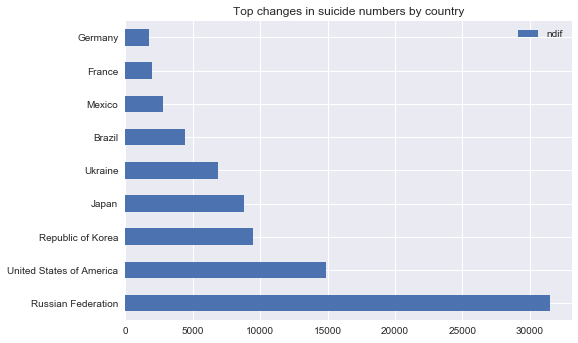

In [158]:
# Difference in TOTAL number of cases ! 
m_w_all_age = calc_change(dfa)
dts=m_w_all_age.drop(['nmax', 'nmax_year', 'nmin', 'nmin_year', 'rdif' \
    , 'rmax', 'rmax_year', 'rmin', 'rmin_year'], axis=1)
dts.sort_values('ndif', inplace=True, ascending=False)
dtsl=dts[0:9]
dtsl.plot(kind='barh', title='Top changes in suicide numbers by country')
plt.savefig("num_diff.png")
plt.show()

In [215]:
m_w_all_age.sort_values('rdif', inplace=True, ascending=False)
m_w_all_age.head(11)

,ndif,nmax,nmax_year,nmin,nmin_year,rdif,rmax,rmax_year,rmin,rmin_year
Suriname,95.0,147.0,2008.0,52.0,2000.0,326.169537,454.097997,2012.0,127.928459,2000.0
Aruba,8.0,10.0,2000.0,2.0,2003.0,292.394755,305.328856,2000.0,12.934101,2003.0
Republic of Korea,9462.0,15906.0,2011.0,6444.0,2000.0,270.905710,519.523209,2009.0,248.617500,2000.0
Russian Federation,31526.0,56958.0,2001.0,25432.0,2015.0,267.708046,504.636239,2001.0,236.928193,2015.0
Seychelles,6.0,9.0,2013.0,3.0,2012.0,242.238429,275.743514,2006.0,33.505085,2012.0
Hungary,1401.0,3269.0,2000.0,1868.0,2015.0,220.280808,464.573382,2000.0,244.292574,2014.0
Latvia,388.0,770.0,2000.0,382.0,2014.0,211.007137,453.207078,2000.0,242.199941,2013.0
Lithuania,735.0,1631.0,2000.0,896.0,2015.0,197.684557,571.809046,2000.0,374.124489,2012.0
Belarus,1742.0,3483.0,2000.0,1741.0,2014.0,194.376165,447.282272,2000.0,252.906107,2014.0
Saint Vincent and Grenadines,10.0,11.0,2007.0,1.0,2009.0,191.744922,202.925602,2002.0,11.180680,2009.0


##### A3: changes in rate

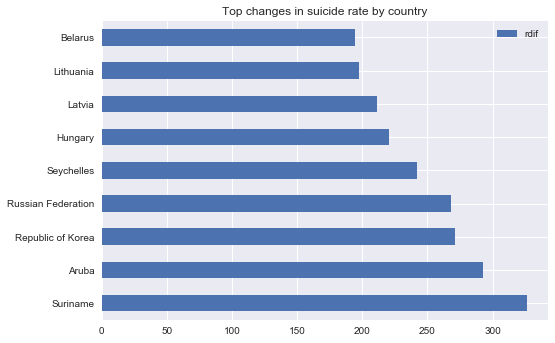

In [163]:
dts=m_w_all_age.drop(['nmax', 'nmax_year', 'nmin', 'nmin_year', 'ndif' \
    , 'rmax', 'rmax_year', 'rmin', 'rmin_year'], axis=1)
dts.sort_values('rdif', inplace=True, ascending=False)
dtsl=dts[0:9]
dtsl.plot(kind='barh', title='Top changes in suicide rate by country')
plt.savefig("rate_diff.png")
plt.show()

In [ ]:
# plot it 
# plot top n countries 
dtall=m_w_all_age.drop() 
sy.plot(kind='hist', title='Histogram of rates for 3 contries between 20001 - 2010')
fig, (ax1, ax2) = plt.subplots(ncols=2)
# man
mr= mcfg.iloc[0:14,0]
mr.plot(x='dif',y=sh.index, kind='barh',figsize = (15,10), title='Man', ax=ax1)
#woman
wr=wmcfg.iloc[0:14,0]
wr.plot(x='dif',y=sh.index, kind='barh',figsize = (15,10), title='Woman', ax=ax2)
plt.subplots_adjust( wspace=0.4)
plt.suptitle('Biggest improvements in suisides rates for young man and woman in 2000 - 2015', fontsize=15)
fig.savefig("young_improv_big.png")
plt.show()

In [188]:
# Calculate the change for men and women separately
# men

df_m=dfa[dfa['sex_encoder']== 1] 
m_all_age = calc_change(df_m)
#m_all_age.head(5)
dt_ml=m_all_age.drop(['nmax', 'nmax_year', 'nmin', 'nmin_year', 'rdif' \
    , 'rmax', 'rmax_year', 'rmin', 'rmin_year'], axis=1)
dt_ml.sort_values('ndif', inplace=True, ascending=False)
mlsm=dt_ml[0:9]

#plt.savefig("rate_diff.png")
#plt.show()



In [194]:
fm=dfa[dfa['sex_encoder']== 0] 
fmc = calc_change(fm)
fml=fmc.drop(['nmax', 'nmax_year', 'nmin', 'nmin_year', 'rdif' \
    , 'rmax', 'rmax_year', 'rmin', 'rmin_year'], axis=1)
fml.sort_values('ndif', inplace=True, ascending=False)
fmls=fml[0:9]
fmls.head(11)


,ndif
Russian Federation,4528.0
United States of America,4467.0
Republic of Korea,3512.0
Japan,2039.0
Ukraine,1207.0
Brazil,1017.0
France,729.0
Mexico,711.0
Germany,686.0


#####  A4:  Difference between men and women in event  total numbers 

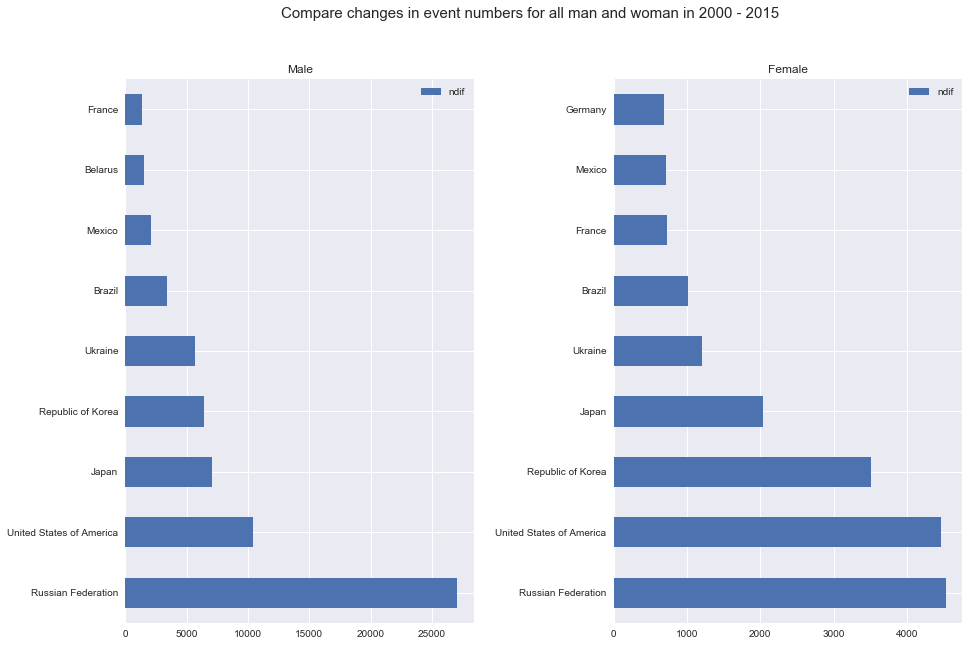

In [251]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
# man
mlsm.plot( kind='barh',figsize = (15,10), title='Male', ax=ax1)
#woman
fmls.plot( kind='barh',figsize = (15,10), title='Female', ax=ax2)
plt.subplots_adjust( wspace=0.4)
plt.suptitle('Compare changes in event numbers for all man and woman in 2000 - 2015', fontsize=15)
fig.savefig("compare_male_female_num.png")
plt.show()


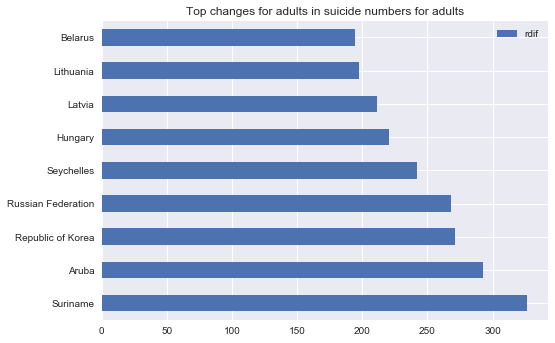

In [268]:
# select only one age agroup
# dfa starting cohort 

dfa3=dfa[dfa['age_encoder'] ==3]
dfa3.head(5)

m_w_a3 = calc_change(dfa3)
dts3=m_w_a3.drop(['nmax', 'nmax_year', 'nmin', 'nmin_year', 'rdif' \
    , 'rmax', 'rmax_year', 'rmin', 'rmin_year'], axis=1)
dts3.sort_values('ndif', inplace=True, ascending=False)
dtsl3=dts[0:9]
dtsl3.plot(kind='barh', title='Top changes for adults in suicide numbers for adults')
plt.savefig("dts3_num_diff.png")
plt.show()

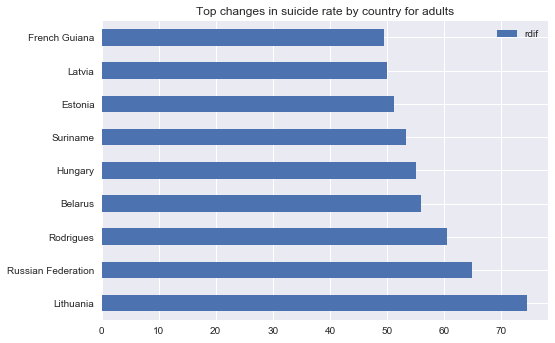

In [269]:
dts3r=m_w_a3.drop(['nmax', 'nmax_year', 'nmin', 'nmin_year', 'ndif' \
    , 'rmax', 'rmax_year', 'rmin', 'rmin_year'], axis=1)
dts3r.sort_values('rdif', inplace=True, ascending=False)
dtsl3r=dts3r[0:9]
dtsl3r.plot(kind='barh', title='Top changes in suicide rate by country for adults')
plt.savefig("rate_diff_3r.png")
plt.show()


##### compare men women for adults only 

In [281]:
dfa3m=dfa3[dfa3['sex_encoder'] ==1]
dfa3f=dfa3[dfa3['sex_encoder'] ==0]
d3dif_m= calc_change(df=dfa3m)
d3dif_f= calc_change(df=dfa3f)

a3nd_m=d3dif_m.drop(['nmax', 'nmax_year', 'nmin', 'nmin_year', 'rdif' \
    , 'rmax', 'rmax_year', 'rmin', 'rmin_year'], axis=1)
a3nd_m.sort_values('ndif', inplace=True, ascending=False)
a3nms=a3nd_m[0:9]
#----------------- 
a3nd_f=d3dif_f.drop(['nmax', 'nmax_year', 'nmin', 'nmin_year', 'rdif' \
    , 'rmax', 'rmax_year', 'rmin', 'rmin_year'], axis=1)
a3nd_f.sort_values('ndif', inplace=True, ascending=False)
a3nfs=a3nd_f[0:9]

d3dif_f.head(33)
#

,ndif,nmax,nmax_year,nmin,nmin_year,rdif,rmax,rmax_year,rmin,rmin_year
Albania,14.0,19.0,2008.0,5.0,2000.0,3.319275,4.824392,2008.0,1.505117,2000.0
Argentina,60.0,210.0,2001.0,150.0,2009.0,1.797057,4.875991,2001.0,3.078934,2013.0
Armenia,9.0,10.0,2008.0,1.0,2000.0,1.914154,2.094236,2008.0,0.180083,2000.0
Aruba,1.0,2.0,2000.0,1.0,2008.0,7.303595,12.800819,2000.0,5.497224,2008.0
Australia,111.0,294.0,2015.0,183.0,2004.0,2.872399,9.177052,2015.0,6.304653,2004.0
Austria,62.0,141.0,2003.0,79.0,2015.0,5.413004,11.618651,2003.0,6.205647,2015.0
Azerbaijan,13.0,16.0,2001.0,3.0,2000.0,1.220250,1.520190,2001.0,0.299940,2000.0
Bahamas,0.0,1.0,2007.0,1.0,2007.0,0.209207,2.041816,2007.0,1.832609,2013.0
Bahrain,3.0,4.0,2002.0,1.0,2001.0,4.130416,5.604125,2002.0,1.473709,2001.0
Barbados,1.0,2.0,2000.0,1.0,2008.0,2.645495,4.956138,2000.0,2.310643,2008.0


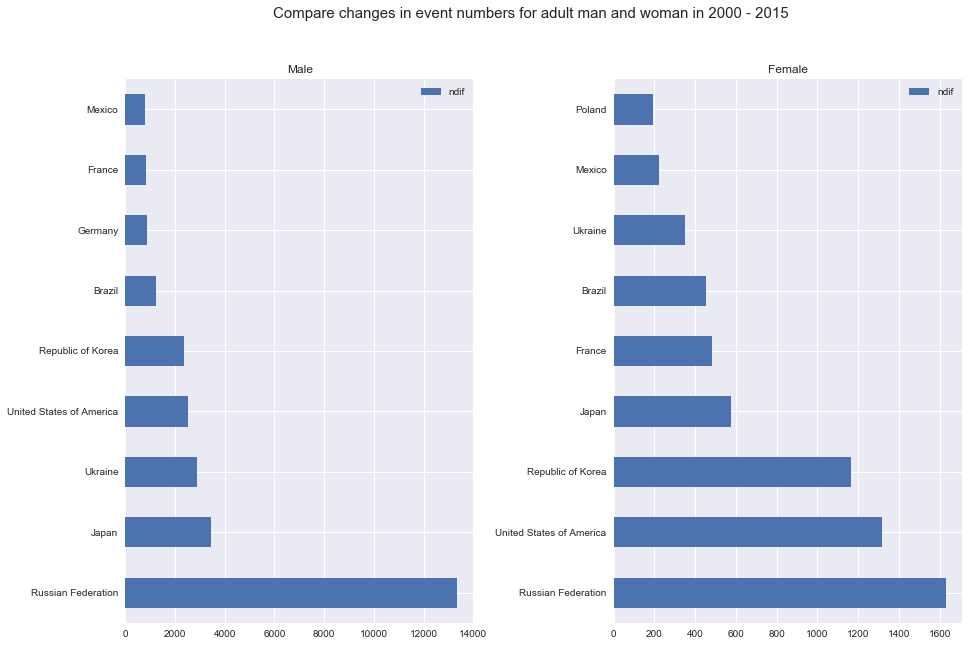

In [266]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
# man
a3nms.plot( kind='barh',figsize = (15,10), title='Male', ax=ax1)
#woman
a3nfs.plot( kind='barh',figsize = (15,10), title='Female', ax=ax2)
plt.subplots_adjust( wspace=0.4)
plt.suptitle('Compare changes in event numbers for adult man and woman in 2000 - 2015', fontsize=15)
fig.savefig("adult_male_female_num.png")
plt.show()

##### A6: Improvements and setbacks

In [299]:
# choose one that shows changes for the best
#men changed for good  year
d3_gd_m=d3dif_m[d3dif_m['nmin_year'] > d3dif_m['nmax_year']]
d3dgd_m=d3_gd_m.drop(['nmax', 'nmax_year', 'nmin', 'nmin_year', 'rdif' \
    , 'rmax', 'rmax_year', 'rmin', 'rmin_year'], axis=1)
d3dgd_m.sort_values('ndif', inplace=True, ascending=False)
gd_m=d3dgd_m[0:9]
#
# changes for bad
#
d3_bd_m=d3dif_m[d3dif_m['nmin_year'] < d3dif_m['nmax_year']]
d3dbd_m=d3_bd_m.drop(['nmax', 'nmax_year', 'nmin', 'nmin_year', 'rdif' \
    , 'rmax', 'rmax_year', 'rmin', 'rmin_year'], axis=1)
d3dbd_m.sort_values('ndif', inplace=True, ascending=False)
bd_m=d3dbd_m[0:9]
gd_m.head(4)


,ndif
Russian Federation,13364.0
Japan,3441.0
Ukraine,2895.0
Germany,890.0


In [300]:
#
# the same for female
#
# good
d3_gd_f=d3dif_f[d3dif_f['nmin_year'] > d3dif_f['nmax_year']]
a3dg_f=d3_gd_f.drop(['nmax', 'nmax_year', 'nmin', 'nmin_year', 'rdif' \
    , 'rmax', 'rmax_year', 'rmin', 'rmin_year'], axis=1)
a3dg_f.sort_values('ndif', inplace=True, ascending=False)
gd_f=a3dg_f[0:9]
gd_f.head(10)
#
# bad
#
d3_bd_f=d3dif_f[d3dif_f['nmin_year'] < d3dif_f['nmax_year']]
a3bd_f=d3_bd_f.drop(['nmax', 'nmax_year', 'nmin', 'nmin_year', 'rdif' \
    , 'rmax', 'rmax_year', 'rmin', 'rmin_year'], axis=1)
a3bd_f.sort_values('ndif', inplace=True, ascending=False)
bd_f=a3bd_f[0:9]

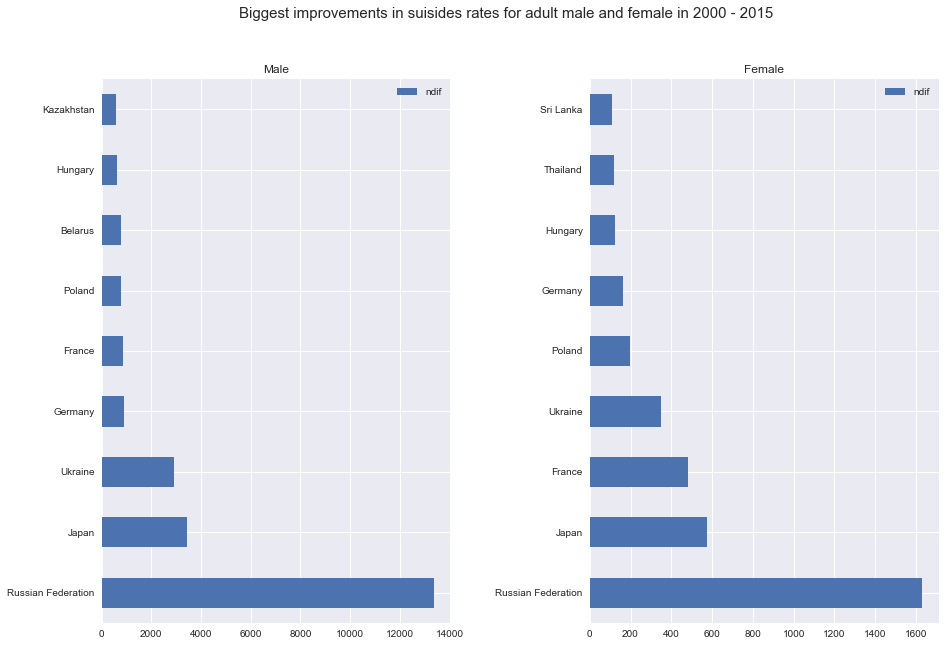

In [301]:
# plot top n countries 
# plot changes for good 
#
fig, (ax1, ax2) = plt.subplots(ncols=2)
gd_m.plot( kind='barh',figsize = (15,10), title='Male', ax=ax1)
#woman
gd_f.plot( kind='barh',figsize = (15,10), title='Female', ax=ax2)
plt.subplots_adjust( wspace=0.4)
plt.suptitle('Biggest improvements in suisides rates for adult male and female in 2000 - 2015', fontsize=15)
fig.savefig("adult_improv_big.png")
plt.show()
 

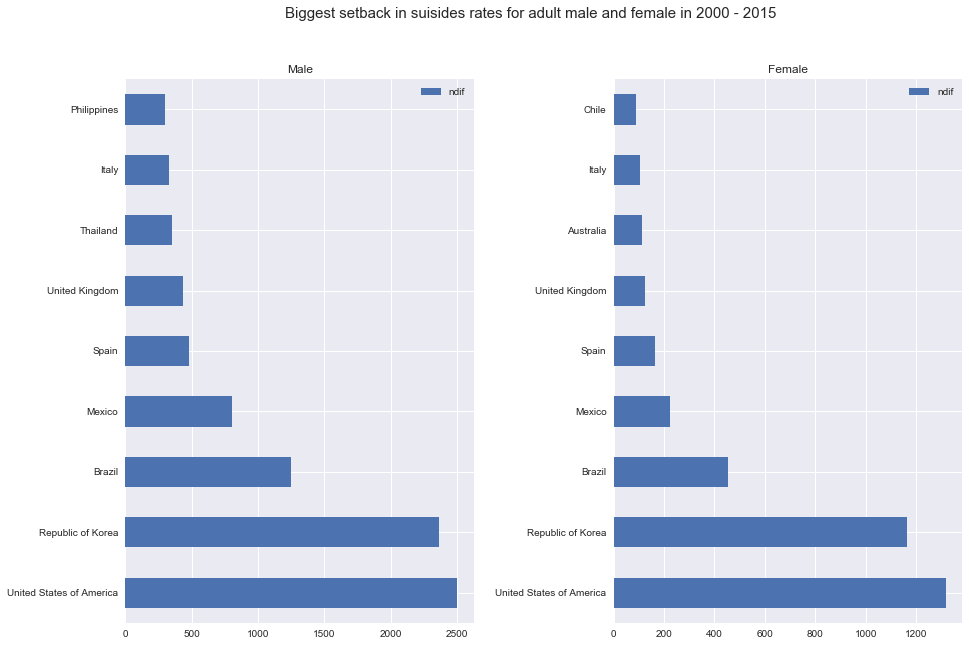

In [304]:
# plot top n countries 
# plot changes for good 
#
fig, (ax1, ax2) = plt.subplots(ncols=2)
bd_m.plot( kind='barh',figsize = (15,10), title='Male', ax=ax1)
#woman
bd_f.plot( kind='barh',figsize = (15,10), title='Female', ax=ax2)
plt.subplots_adjust( wspace=0.4)
plt.suptitle('Biggest setback in suisides rates for adult male and female in 2000 - 2015', fontsize=15)
fig.savefig("adult_stback_big.png")
plt.show()